In [1]:
from fastai.vision.all import *
from fastai.callback import *

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [2]:
#SEED = 2042

seed_value = 403


random.seed(seed_value)
np.random.seed(seed_value)
torch.manual_seed(seed_value)


torch.cuda.manual_seed(seed_value)
torch.cuda.manual_seed_all(seed_value) # gpu vars
torch.backends.cudnn.deterministic = True  #needed
torch.backends.cudnn.benchmark = False

In [3]:
path = Path('/disks/data_03/datasets/Leukemia/ALL_IDB_Data_Code_Paper/ALL_IDB2/img')

In [4]:
files = get_image_files(path)
len(files)

260

In [5]:
def label_func(f): return int(os.path.splitext(f)[0][-1])

In [6]:
all_idxs = np.random.permutation(range(len(files)))

test_set_sz = int(len(all_idxs)*.20)
test_idxs = all_idxs[:test_set_sz]

train_val_set_idxs = all_idxs[test_set_sz:]



In [7]:
len(files[train_val_set_idxs])

208

In [8]:
dls = ImageDataLoaders.from_name_func(path, files[train_val_set_idxs], label_func, item_tfms = Resize(224))

In [9]:
# pets = DataBlock(blocks=(ImageBlock, CategoryBlock), 
#                  get_items=get_image_files, 
#                  splitter=RandomSplitter(),
#                  get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
#                  item_tfms=Resize(460),
#                  batch_tfms=aug_transforms(size=224))

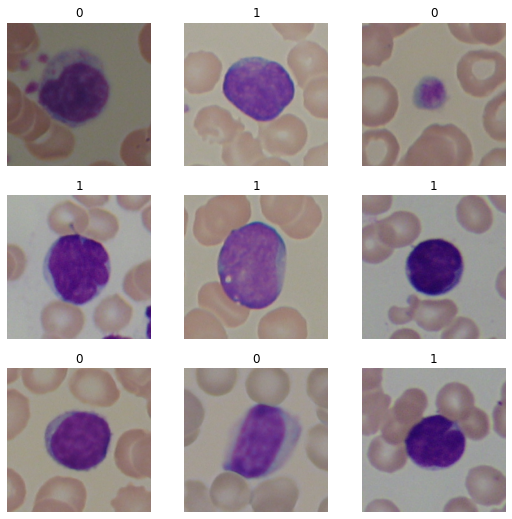

In [10]:
dls.show_batch()

In [11]:
resnet34_learn = cnn_learner(dls, resnet34, metrics=[accuracy, error_rate], cbs=ShowGraphCallback())

/home/tarik/anaconda3/envs/fastai/lib/python3.8/site-packages/fastai/callback/schedule.py:270: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(val, idx, 'ro', label=nm, c=color)


SuggestedLRs(valley=0.0008317637839354575)

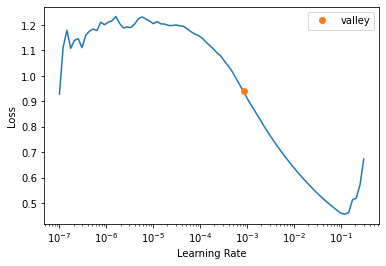

In [12]:
resnet34_learn.lr_find()

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.392393,1.329455,0.536585,0.463415,00:00


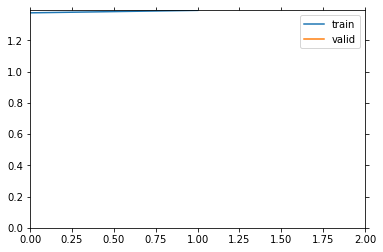

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.983433,0.943823,0.512195,0.487805,00:01
1,0.909155,0.803188,0.560976,0.439024,00:01
2,0.731598,0.720627,0.560976,0.439024,00:01
3,0.589854,0.638409,0.634146,0.365854,00:01
4,0.508528,0.529389,0.682927,0.317073,00:01
5,0.442385,0.413561,0.829268,0.170732,00:00
6,0.384314,0.341023,0.829268,0.170732,00:01
7,0.332922,0.263550,0.926829,0.073171,00:01
8,0.290730,0.224416,0.902439,0.097561,00:01
9,0.256588,0.229280,0.926829,0.073171,00:01


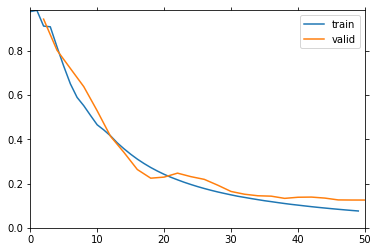

In [13]:
resnet34_learn.fine_tune(25, 1e-3)

In [14]:

preds_gt = [(resnet34_learn.predict(files[test_idxs[i]])[0], label_func(files[test_idxs[i]]) )  for i in range(len(test_idxs)) ];
preds, gts = np.array(preds_gt)[:,0], np.array(preds_gt)[:,1]


In [15]:
print(accuracy_score(gts, preds))

print(classification_report(gts, preds))

tn, fp, fn, tp = confusion_matrix(gts, preds).ravel()

sens = tp/(tp + fn)

spec = tn/(tn + fp)

print(sens, spec)

0.9807692307692307
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        29
           1       0.96      1.00      0.98        23

    accuracy                           0.98        52
   macro avg       0.98      0.98      0.98        52
weighted avg       0.98      0.98      0.98        52

1.0 0.9655172413793104


In [16]:
resnet50_learn = cnn_learner(dls, resnet50, metrics=[accuracy, error_rate], cbs=ShowGraphCallback())

/home/tarik/anaconda3/envs/fastai/lib/python3.8/site-packages/fastai/callback/schedule.py:270: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(val, idx, 'ro', label=nm, c=color)


SuggestedLRs(valley=0.0003311311302240938)

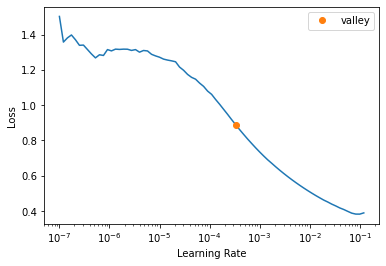

In [17]:
resnet50_learn.lr_find()

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.096526,0.729790,0.536585,0.463415,00:01


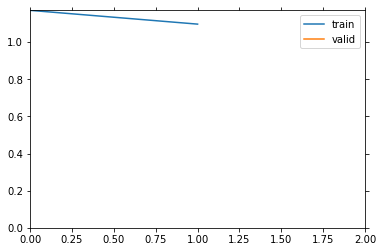

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.736742,0.710097,0.609756,0.390244,00:01
1,0.705107,0.732744,0.658537,0.341463,00:01
2,0.642950,0.695925,0.634146,0.365854,00:01
3,0.561740,0.629931,0.609756,0.390244,00:01
4,0.475827,0.629485,0.609756,0.390244,00:01
5,0.406558,0.680021,0.658537,0.341463,00:01
6,0.350350,0.731334,0.682927,0.317073,00:01
7,0.301816,0.794816,0.707317,0.292683,00:01
8,0.266920,0.821877,0.756098,0.243902,00:01
9,0.235941,0.820070,0.756098,0.243902,00:01


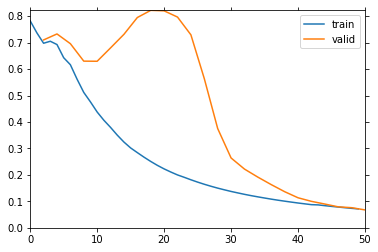

In [18]:
resnet50_learn.fine_tune(25, 4e-4)

In [19]:

preds_gt = [(resnet50_learn.predict(files[test_idxs[i]])[0], label_func(files[test_idxs[i]]) )  for i in range(len(test_idxs)) ];
preds, gts = np.array(preds_gt)[:,0], np.array(preds_gt)[:,1]


In [20]:
print(accuracy_score(gts, preds))

print(classification_report(gts, preds))

tn, fp, fn, tp = confusion_matrix(gts, preds).ravel()

sens = tp/(tp + fn)

spec = tn/(tn + fp)

print(sens, spec)

0.9807692307692307
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        29
           1       0.96      1.00      0.98        23

    accuracy                           0.98        52
   macro avg       0.98      0.98      0.98        52
weighted avg       0.98      0.98      0.98        52

1.0 0.9655172413793104


In [21]:
resnet101_learn = cnn_learner(dls, resnet101, metrics=[accuracy, error_rate], cbs=ShowGraphCallback())

/home/tarik/anaconda3/envs/fastai/lib/python3.8/site-packages/fastai/callback/schedule.py:270: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(val, idx, 'ro', label=nm, c=color)


SuggestedLRs(valley=0.0003981071640737355)

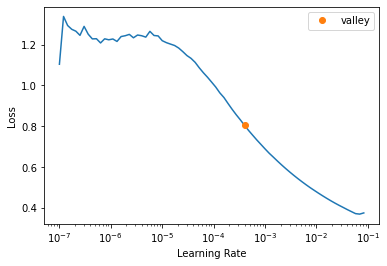

In [22]:
resnet101_learn.lr_find()

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.063858,1.282193,0.536585,0.463415,00:01


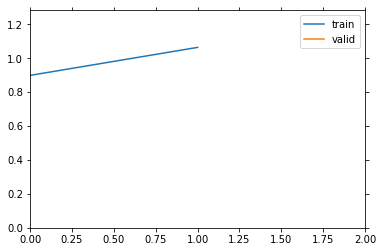

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.963814,1.226270,0.536585,0.463415,00:01
1,0.879156,1.072541,0.536585,0.463415,00:01
2,0.763401,0.977581,0.487805,0.512195,00:01
3,0.669249,0.837115,0.512195,0.487805,00:01
4,0.637924,0.624572,0.585366,0.414634,00:01
5,0.566336,0.475709,0.829268,0.170732,00:01
6,0.500745,0.436487,0.756098,0.243902,00:01
7,0.443692,0.406917,0.829268,0.170732,00:01
8,0.396301,0.366514,0.853659,0.146342,00:01
9,0.352311,0.361302,0.829268,0.170732,00:01


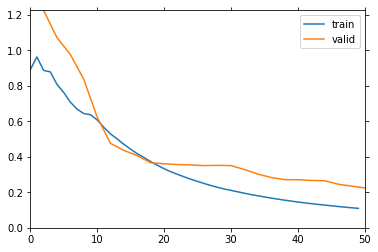

In [23]:
resnet101_learn.fine_tune(25, 2e-4)

In [24]:
preds_gt = [(resnet101_learn.predict(files[test_idxs[i]])[0], label_func(files[test_idxs[i]]) )  for i in range(len(test_idxs)) ];
preds, gts = np.array(preds_gt)[:,0], np.array(preds_gt)[:,1]


In [25]:
print(accuracy_score(gts, preds))

print(classification_report(gts, preds))

tn, fp, fn, tp = confusion_matrix(gts, preds).ravel()

sens = tp/(tp + fn)

spec = tn/(tn + fp)

print(sens, spec)

0.9230769230769231
              precision    recall  f1-score   support

           0       1.00      0.86      0.93        29
           1       0.85      1.00      0.92        23

    accuracy                           0.92        52
   macro avg       0.93      0.93      0.92        52
weighted avg       0.93      0.92      0.92        52

1.0 0.8620689655172413


In [26]:
vgg16_learn = cnn_learner(dls, vgg16_bn, metrics=[accuracy, error_rate], cbs=ShowGraphCallback())

/home/tarik/anaconda3/envs/fastai/lib/python3.8/site-packages/fastai/callback/schedule.py:270: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(val, idx, 'ro', label=nm, c=color)


SuggestedLRs(valley=0.0006918309954926372)

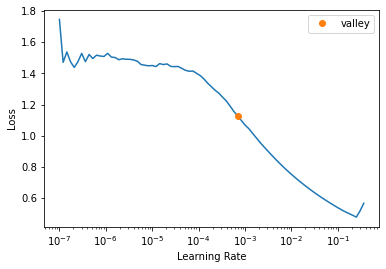

In [27]:
vgg16_learn.lr_find()

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.678602,0.655970,0.560976,0.439024,00:01


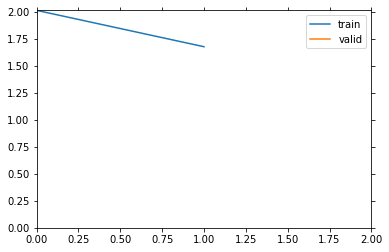

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.104010,0.619566,0.609756,0.390244,00:02
1,0.945753,0.588304,0.634146,0.365854,00:02
2,0.803707,0.526722,0.731707,0.268293,00:02
3,0.660712,0.457269,0.804878,0.195122,00:02
4,0.566570,0.393915,0.829268,0.170732,00:02
5,0.489722,0.344223,0.853659,0.146342,00:02
6,0.419352,0.288589,0.853659,0.146342,00:02
7,0.361747,0.230811,0.902439,0.097561,00:02
8,0.317028,0.177525,0.975610,0.024390,00:02
9,0.281489,0.136289,1.000000,0.000000,00:02


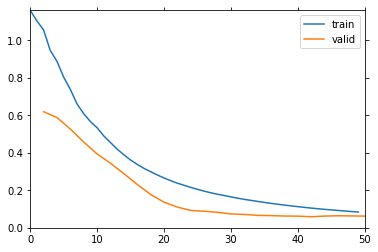

In [28]:
vgg16_learn.fine_tune(25, 1e-3)

In [29]:
preds_gt = [(vgg16_learn.predict(files[test_idxs[i]])[0], label_func(files[test_idxs[i]]) )  for i in range(len(test_idxs)) ];
preds, gts = np.array(preds_gt)[:,0], np.array(preds_gt)[:,1]


In [30]:
print(accuracy_score(gts, preds))

print(classification_report(gts, preds))

tn, fp, fn, tp = confusion_matrix(gts, preds).ravel()

sens = tp/(tp + fn)

spec = tn/(tn + fp)

print(sens, spec)

0.9423076923076923
              precision    recall  f1-score   support

           0       0.96      0.93      0.95        29
           1       0.92      0.96      0.94        23

    accuracy                           0.94        52
   macro avg       0.94      0.94      0.94        52
weighted avg       0.94      0.94      0.94        52

0.9565217391304348 0.9310344827586207


In [31]:
vgg19_learn = cnn_learner(dls, vgg19_bn, metrics=[accuracy, error_rate], cbs=ShowGraphCallback())

/home/tarik/anaconda3/envs/fastai/lib/python3.8/site-packages/fastai/callback/schedule.py:270: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(val, idx, 'ro', label=nm, c=color)


SuggestedLRs(valley=0.0010000000474974513)

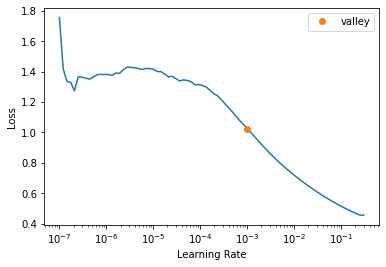

In [32]:
vgg19_learn.lr_find()

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.317742,0.717547,0.585366,0.414634,00:01


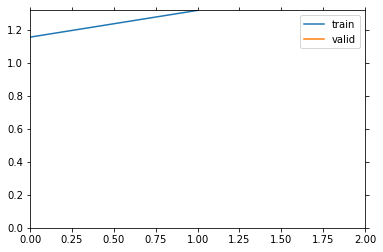

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.134481,0.706090,0.609756,0.390244,00:02
1,1.103621,0.670712,0.585366,0.414634,00:02
2,1.093526,0.641679,0.609756,0.390244,00:02
3,0.963605,0.602747,0.609756,0.390244,00:02
4,0.887126,0.563942,0.634146,0.365854,00:02
5,0.779962,0.506078,0.731707,0.268293,00:02
6,0.701516,0.442392,0.756098,0.243902,00:02
7,0.617454,0.392838,0.780488,0.219512,00:02
8,0.547482,0.356226,0.902439,0.097561,00:02
9,0.488624,0.328228,0.902439,0.097561,00:02


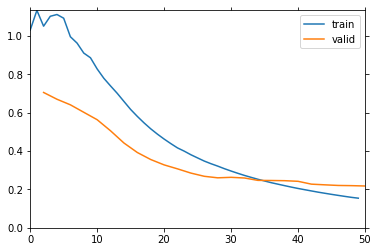

In [33]:
vgg19_learn.fine_tune(25, 5e-4)

In [34]:
preds_gt = [(vgg19_learn.predict(files[test_idxs[i]])[0], label_func(files[test_idxs[i]]) )  for i in range(len(test_idxs)) ];
preds, gts = np.array(preds_gt)[:,0], np.array(preds_gt)[:,1]


In [35]:
print(accuracy_score(gts, preds))

print(classification_report(gts, preds))

tn, fp, fn, tp = confusion_matrix(gts, preds).ravel()

sens = tp/(tp + fn)

spec = tn/(tn + fp)

print(sens, spec)

0.9807692307692307
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        29
           1       1.00      0.96      0.98        23

    accuracy                           0.98        52
   macro avg       0.98      0.98      0.98        52
weighted avg       0.98      0.98      0.98        52

0.9565217391304348 1.0


In [36]:
densenet121_learn = cnn_learner(dls, densenet121, metrics=[accuracy, error_rate], cbs=ShowGraphCallback())

/home/tarik/anaconda3/envs/fastai/lib/python3.8/site-packages/fastai/callback/schedule.py:270: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(val, idx, 'ro', label=nm, c=color)


SuggestedLRs(valley=0.0006918309954926372)

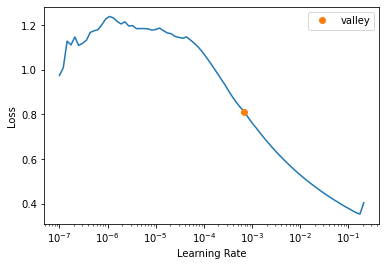

In [37]:
densenet121_learn.lr_find()

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.215637,0.711641,0.609756,0.390244,00:01


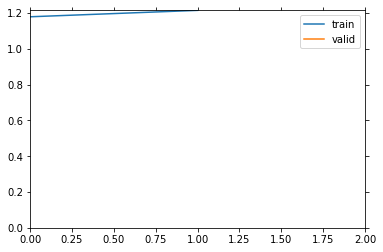

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.684714,0.679126,0.560976,0.439024,00:01
1,0.573867,0.720499,0.634146,0.365854,00:01
2,0.500529,0.725754,0.634146,0.365854,00:01
3,0.434534,0.719053,0.658537,0.341463,00:01
4,0.377689,0.664742,0.634146,0.365854,00:01
5,0.341570,0.627836,0.682927,0.317073,00:01
6,0.298523,0.580062,0.682927,0.317073,00:01
7,0.260824,0.516406,0.731707,0.268293,00:01
8,0.231468,0.434188,0.804878,0.195122,00:01
9,0.206865,0.359856,0.853659,0.146342,00:01


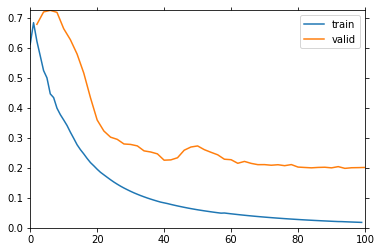

In [38]:
densenet121_learn.fine_tune(50, 1e-3)

In [39]:

preds_gt = [(densenet121_learn.predict(files[test_idxs[i]])[0], label_func(files[test_idxs[i]]) )  for i in range(len(test_idxs)) ];
preds, gts = np.array(preds_gt)[:,0], np.array(preds_gt)[:,1]


In [40]:
print(accuracy_score(gts, preds))

print(classification_report(gts, preds))

tn, fp, fn, tp = confusion_matrix(gts, preds).ravel()

sens = tp/(tp + fn)

spec = tn/(tn + fp)

print(sens, spec)

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        23

    accuracy                           1.00        52
   macro avg       1.00      1.00      1.00        52
weighted avg       1.00      1.00      1.00        52

1.0 1.0


In [11]:
densenet201_learn = cnn_learner(dls, densenet201, metrics=[accuracy, error_rate], cbs=ShowGraphCallback())

/home/tarik/anaconda3/envs/fastai/lib/python3.8/site-packages/fastai/callback/schedule.py:270: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(val, idx, 'ro', label=nm, c=color)


SuggestedLRs(valley=0.0004786300996784121)

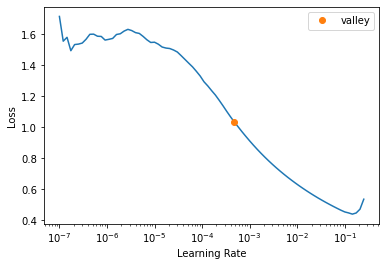

In [12]:
densenet201_learn.lr_find()

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.684975,2.341927,0.536585,0.463415,00:02


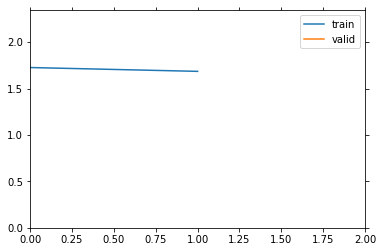

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.399679,1.612202,0.536585,0.463415,00:02
1,1.330294,1.237684,0.536585,0.463415,00:02
2,1.262651,0.968901,0.585366,0.414634,00:02
3,1.175085,0.762610,0.609756,0.390244,00:02
4,1.121710,0.697322,0.560976,0.439024,00:02
5,1.023162,0.719770,0.560976,0.439024,00:02
6,0.933385,0.789649,0.585366,0.414634,00:02
7,0.874622,0.823891,0.512195,0.487805,00:02
8,0.811029,0.803473,0.585366,0.414634,00:02
9,0.748547,0.727934,0.609756,0.390244,00:02


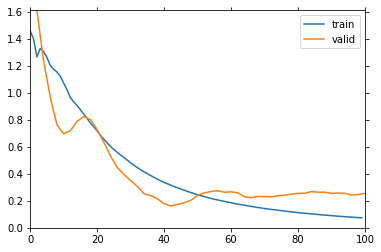

In [13]:
densenet201_learn.fine_tune(50, 2e-4)

# sensisivity, specificity, accuracy, seed, clf


In [14]:

preds_gt = [(densenet201_learn.predict(files[test_idxs[i]])[0], label_func(files[test_idxs[i]]) )  for i in range(len(test_idxs)) ];
preds, gts = np.array(preds_gt)[:,0], np.array(preds_gt)[:,1]

In [16]:
print(accuracy_score(gts, preds))

print(classification_report(gts, preds))

tn, fp, fn, tp = confusion_matrix(gts, preds).ravel()

sens = tp/(tp + fn)

spec = tn/(tn + fp)

print(sens, spec)

0.9615384615384616
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        29
           1       0.96      0.96      0.96        23

    accuracy                           0.96        52
   macro avg       0.96      0.96      0.96        52
weighted avg       0.96      0.96      0.96        52

0.9565217391304348 0.9655172413793104


In [ ]:
# Densenet201
# sens               spec                    accu                    SEED
# 0.9565217391304348 0.9655172413793104      0.9615384615384616      403

In [ ]:
len(dls.valid_ds)

In [ ]:
1/41

In [ ]:
densenet121_learn.show_results()

In [ ]:
interp = Interpretation.from_learner(densenet121_learn)

In [ ]:
interp.plot_top_losses(k=9)

In [ ]:
class_interp = ClassificationInterpretation.from_learner(densenet121_learn)
class_interp.plot_confusion_matrix()

In [ ]:
# class Hook():
#     def hook_func(self, m, i, o): self.stored = o.detach().clone()

In [ ]:
# hook_output = Hook()
# hook = learn.model[0].register_forward_hook(hook_output.hook_func)

In [ ]:
# https://github.com/fastai/fastbook/blob/master/18_CAM.ipynb
# https://forums.fast.ai/t/any-gradcam-heatmap-code-available-for-v2/63060